# Exercise 3

In [92]:
import numpy as np
from astropy.units import km, s, pc, R_sun, M_sun
from astropy.constants import G

N_stars = 1e6
v_stars = 10 * km/s
n_stars = 10/pc**3
d_sun = 2*R_sun
d_giant = 2*100 * R_sun

def tau_c(n, v, d):
    return 1/(n*v*np.pi*d**2)

# calculate the timescale:
# a)
tau_sun_like = tau_c(n_stars, v_stars, d_sun).to_value('Gyr')
tau_giant_like = tau_c(n_stars, v_stars, d_giant).to_value('Gyr')
print(f"{tau_sun_like = :.2e} Gyr")
print(f"{tau_giant_like = :.2e} Gyr")

# b)
n_stars_center = 500/pc**3
tau_sun_like = tau_c(n_stars_center, v_stars, d_sun).to_value('Gyr')
tau_giant_like = tau_c(n_stars_center, v_stars, d_giant).to_value('Gyr')
print(f"center: {tau_sun_like = :.2e} Gyr")
print(f"center: {tau_giant_like = :.2e} Gyr")

# c)

# d)
def t_relax(v, m, n):
    return v**3/(8*np.pi*G**2*m**2*n*15)

t_relax(v_stars, M_sun, n_stars).to("yr")

tau_sun_like = 1.53e+09 Gyr
tau_giant_like = 1.53e+05 Gyr
center: tau_sun_like = 3.06e+07 Gyr
center: tau_giant_like = 3.06e+03 Gyr


<Quantity 1.40214614e+10 yr>

# Exercise 4

\alpha = 7329534.458564344\pm[ 1.10225672e+12 -2.18851294e+14]
\beta = -1065370473.1509546\pm[-2.18851294e+14  5.03433712e+16]
\alpha = 0.028765624149096152\pm[ 0.00912696 -0.05394781]
\beta = 4.243654153984649\pm[-0.05394781  0.31902466]
\alpha = 1145692068.1748116\pm[ 5.99734858e+16 -1.36946918e+05]
\beta = 0.007688957670570866\pm[-1.36946918e+05  7.86797327e-07]


c:\Users\fabia\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


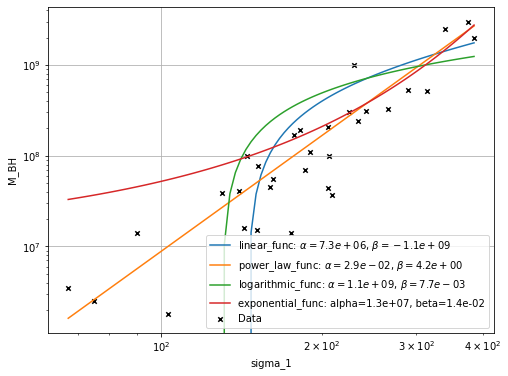

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def parse_bh_mass(bh_str: str) -> float:
    value = bh_str.split("(")[0]
    value = value.replace("10", "e").replace("X", "").replace(" ", "")
    return float(value)

def linear_func(x, alpha, beta):
    return alpha*x + beta

def exponential_func(x, alpha, beta):
    return alpha*np.exp(beta * x)

def power_law_func(x, alpha, beta):
    return alpha* x**beta

def logarithmic_func(x, alpha, beta):
    return alpha*np.log(x*beta)


df = pd.read_csv("./data/PS09_04_BH_data_p4.csv", names=["galaxy", "type", "M_B", "M_BH", "Method", "sigma_1", "dist", "M/L", "ref"], skiprows=1)
df.head()
df["M_BH"] = df.M_BH.apply(parse_bh_mass)


fig, ax = plt.subplots(figsize=(8, 6))
df.plot.scatter("sigma_1", "M_BH", ax=ax, s=20, c="k", marker="x", label="Data")
ax.grid()

x_vals = np.linspace(df.sigma_1.min(), df.sigma_1.max(), 100)
for func in [linear_func, power_law_func, logarithmic_func]:
    (alpha, beta), (alpha_err, beta_err) = curve_fit(func, df["sigma_1"], df["M_BH"])
    ax.plot(x_vals, func(x_vals, alpha, beta), label=f"{func.__name__}: $\\alpha={alpha:.1e}$, $\\beta={beta:.1e}$" )
    print(f"\\alpha = {alpha}\pm{alpha_err}")
    print(f"\\beta = {beta}\pm{beta_err}")
(alpha, beta), (alpha_err, beta_err) = curve_fit(exponential_func, df["sigma_1"], df["M_BH"], [1, 0.1])
ax.plot(x_vals, exponential_func(x_vals, alpha, beta), label=f"{exponential_func.__name__}: {alpha=:.1e}, {beta=:.1e}" )
ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")

In [94]:
np.log10(2.9e-2)

-1.537602002101044